In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, SimpleRNN, LSTM

In [143]:
from tensorflow.keras.datasets import imdb

In [145]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=500)

In [146]:
x_train =  x_train[:2500]
x_test = x_test[:2500]
y_train = y_train[:2500]
y_test = y_test[:2500]

In [147]:
print(x_train.shape, x_test.shape)

(2500,) (2500,)


In [148]:
x_train[:4]

array([list([1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
       list([1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 2, 8, 118, 2, 14, 394, 20, 13, 119, 2, 189, 102, 5, 207, 110, 2, 21, 

In [149]:
y_train[:4] # 긍부정 binary cls

array([1, 0, 0, 1])

In [150]:
lengths = [len(line) for line in x_train]

(array([  8.,  34.,  79.,  67.,  75., 103., 242., 262., 212., 158., 144.,
        117.,  94.,  94.,  70.,  71.,  41.,  49.,  50.,  47.,  37.,  35.,
         24.,  21.,  29.,  21.,  28.,  18.,  22.,  16.,  13.,  16.,  20.,
         11.,  10.,  10.,   9.,  11.,  18.,  11.,   3.,   7.,   8.,   7.,
          6.,   5.,   4.,   8.,   3.,   4.,   5.,   3.,   3.,   2.,   2.,
          3.,   5.,   3.,   2.,   2.,   5.,   9.,   1.,   2.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([  16.  ,   32.13,   48.26,   64.39,   80.52,   96.65,  112.78,
         128.91,  145.04,  161.17,  177.3 ,  193.43,  209.56,  225.69,
         241.82,  257.95,  274.08,  290.21,  306.34,  322.47,  338.6 ,
         354.73,  370.86,  386.99,  403.12,  419.25,  435.38,  451.51,
         467.64,  483.77,  499.9 ,

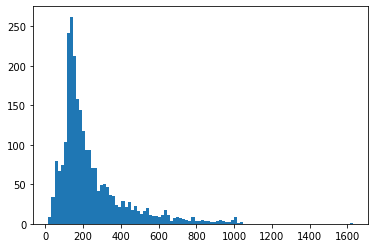

In [151]:
plt.hist(lengths, bins=100)

In [162]:
x_train_seq.shape

(2500, 200)

In [152]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [153]:
x_train_seq = pad_sequences(x_train, maxlen=200)
x_test_seq = pad_sequences(x_test, maxlen=200)

In [154]:
print(x_train_seq.shape, x_test_seq.shape)

(2500, 200) (2500, 200)


In [155]:
len(x_train_seq[0])

200

In [156]:
x_train_seq

array([[  5,  25, 100, ...,  19, 178,  32],
       [  0,   0,   0, ...,  16, 145,  95],
       [  0,   0,   0, ...,   7, 129, 113],
       ...,
       [207, 126, 110, ...,  30,   2, 133],
       [  2, 123,   6, ...,  95, 106,  15],
       [  2,   2,  34, ...,   2, 457, 158]], dtype=int32)

In [ ]:
model = Sequential()
model.add(SimpleRNN(8, input_shape=(200, 1)))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 8)                 80        
                                                                 
 dense_13 (Dense)            (None, 1)                 9         
                                                                 
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
model.fit(x_train_seq, y_train, epochs=10, batch_size=64, validation_data=(x_test_seq, y_test))

Epoch 1/10
40/40 [==============================] - 3s 46ms/step - loss: 0.7584 - accuracy: 0.5108 - val_loss: 0.7208 - val_accuracy: 0.4764
Epoch 2/10
40/40 [==============================] - 2s 40ms/step - loss: 0.7063 - accuracy: 0.4900 - val_loss: 0.7063 - val_accuracy: 0.4804
Epoch 3/10
11/40 [=======>......................] - ETA: 0s - loss: 0.6977 - accuracy: 0.5142

KeyboardInterrupt: ignored

In [157]:
from tensorflow.keras.utils import to_categorical

In [158]:
x_train_oh = to_categorical(x_train_seq)
x_test_oh = to_categorical(x_test_seq)

In [ ]:
model = Sequential()
model.add(SimpleRNN(8, input_shape=(200, 500)))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 8)                 4072      
                                                                 
 dense_14 (Dense)            (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
model.fit(x_train_oh, y_train, epochs=10, batch_size=64, validation_data=(x_test_oh, y_test))

In [ ]:
model = Sequential()
model.add(LSTM(8, input_shape=(200, 500)))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 8)                 16288     
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 16,297
Trainable params: 16,297
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
hist = model.fit(x_train_oh.astype(float), y_train, epochs=10, batch_size=64, validation_data=(x_test_oh.astype(float), y_test))

In [159]:
x_train_oh.shape

(2500, 200, 500)

In [ ]:
model = Sequential()
model.add(Embedding(500, 16, input_length=200))
model.add(LSTM(8, input_shape=(200, 16)))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 200, 16)           8000      
                                                                 
 lstm_12 (LSTM)              (None, 8)                 800       
                                                                 
 dense_16 (Dense)            (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
hist = model.fit(x_train_seq, y_train, epochs=10, batch_size=64, validation_data=(x_test_seq, y_test))

Epoch 1/10
40/40 [==============================] - 7s 129ms/step - loss: 0.6904 - accuracy: 0.5360 - val_loss: 0.6885 - val_accuracy: 0.4872
Epoch 2/10
40/40 [==============================] - 4s 91ms/step - loss: 0.6584 - accuracy: 0.6088 - val_loss: 0.6136 - val_accuracy: 0.7388
Epoch 3/10
40/40 [==============================] - 4s 89ms/step - loss: 0.5821 - accuracy: 0.7404 - val_loss: 0.5647 - val_accuracy: 0.7620
Epoch 4/10
40/40 [==============================] - 4s 88ms/step - loss: 0.5221 - accuracy: 0.7860 - val_loss: 0.5276 - val_accuracy: 0.7660
Epoch 5/10
40/40 [==============================] - 4s 89ms/step - loss: 0.4735 - accuracy: 0.8048 - val_loss: 0.4976 - val_accuracy: 0.7824
Epoch 6/10
40/40 [==============================] - 4s 89ms/step - loss: 0.4395 - accuracy: 0.8180 - val_loss: 0.4836 - val_accuracy: 0.7824
Epoch 7/10
40/40 [==============================] - 4s 93ms/step - loss: 0.4256 - accuracy: 0.8288 - val_loss: 0.4762 - val_accuracy: 0.7776
Epoch 8/10
4

In [ ]:
import tensorflow as tf

In [ ]:
intermediate_layer_model = tf.keras.Model(inputs=model.input, outputs=model.layers[0].output)
# intermediate_output = intermediate_layer_model(x_train_seq)

In [ ]:
output = intermediate_layer_model(x_train_seq)

In [ ]:
output

<tf.Tensor: shape=(2500, 200, 16), dtype=float32, numpy=
array([[[-0.09135644, -0.04869581, -0.04055377, ..., -0.01465036,
         -0.03005992,  0.01201615],
        [-0.06905527, -0.04049703, -0.04655568, ..., -0.07946708,
         -0.07095486,  0.00658687],
        [ 0.0526533 ,  0.07216694,  0.12955011, ...,  0.1418782 ,
          0.12657237, -0.07608183],
        ...,
        [ 0.01568034,  0.01395022, -0.01841618, ..., -0.0190776 ,
          0.04374856,  0.02214055],
        [-0.10189782, -0.10490197, -0.12822148, ..., -0.10283548,
         -0.04676088,  0.05457735],
        [ 0.02544814, -0.02410973,  0.04479079, ...,  0.05322944,
         -0.02515386,  0.02899501]],

       [[-0.01688769, -0.00834416, -0.00431701, ...,  0.00155785,
          0.05737289,  0.01116735],
        [-0.01688769, -0.00834416, -0.00431701, ...,  0.00155785,
          0.05737289,  0.01116735],
        [-0.01688769, -0.00834416, -0.00431701, ...,  0.00155785,
          0.05737289,  0.01116735],
        ..